<h1><center/>Finding Marketing Investment Opportunities - Yandex.Afisha User Analysis</h1>

## 1.General Overview

<a id='item 1'></a>
### <u>Introduction:</u>
The company Yandex.Afisha is interested in understanding more about their users to better allocate their marketing funds. As an anlyst intern, this analysis provided the company with an overview of their user's visit and spending trends as well as their return on marketing investment (ROMI). In general, ROMI amongst the marketing sources was shown to be in the ranges of \\$0.36 to \\$0.43 per user with an average of 9 months till pay off. More focus should be placed on retaining early users given the high first month churn rate at an average of 95%. 
> The following report pertains to Yandex.Afisha users in the United States.

### <u>Marketing Business Goals - Outline for Analysis</u>:  
- Show how people use the product
- Show when users start to buy the product
- Show how much money each customer brings
- Show when users start to pay off

### <u>Datasets Used</u>
- *visits_log_us.csv* - Server logs with data on Yandex.Afisha visits from June 2017 through May 2018 (United States)
 - Uid — user's unique identifier
 - Device — user's device
 - Start Ts — session start date and time
 - End Ts — session end date and time
 - Source Id — identifier of the ad source the user came from
- *orders_log_us.csv* - Dump file with all orders for the period
 - Uid — unique identifier of the user making an order
 - Buy Ts — order date and time
 - Revenue — Yandex.Afisha's revenue from the order
- *costs_log_us.csv* - Marketing expenses statistics
 - dt — date
 - costs — expenses on this ad source on this day

### <u>Packages Used</u>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

C:\Users\garci\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We'll start with loading in the datasets, and passing it arguments that will optimize that will convert the selected columns into more memory efficient data types. This will save memory usage and thus make it more efficient to work with. 

### <u>Dataset Overview</u>

In [10]:
costs = pd.read_csv(r"costs_us.csv", parse_dates=['dt'])
orders = pd.read_csv(r"orders_log_us.csv", parse_dates=['Buy Ts'])
visits = pd.read_csv(r"visits_log_us.csv",
                     dtype={
                         'Device': 'category',
                         'Source Id': 'int32'
                     },
                     parse_dates=["Start Ts", "End Ts"])

We're now interested in looking for potential errenous data in the dataframe. For each dataframe we'll use the Pandas <b>.info()</b> and <b>.sample()</b> methods to get a consice summary and brief look at it's content. 

In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Uid        358532 non-null  uint64        
 1   Device     358532 non-null  category      
 2   End Ts     358532 non-null  datetime64[ns]
 3   Source Id  358532 non-null  int32         
 4   Start Ts   358532 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), int32(1), uint64(1)
memory usage: 9.9 MB


The visits datasets consists of 358,532 rows with 5 columns and no null values. All data types have correcltly been converted as well.

In [12]:
visits.sample(5)

,Uid,Device,End Ts,Source Id,Start Ts
262307,3580932989278097930,desktop,2017-10-14 18:45:00,1,2017-10-14 18:41:00
131987,3465908033991667704,desktop,2018-01-16 09:57:00,3,2018-01-16 09:56:00
27077,10696818069003010196,desktop,2018-07-05 22:29:00,1,2018-07-05 22:14:00
58976,5288198036802554916,desktop,2018-01-26 22:38:00,3,2018-01-26 22:36:00
128954,3588338809979700466,desktop,2017-08-18 10:53:00,3,2017-08-18 10:46:00


The output does not show any deviation. We'll move on to the next one.

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


The orders dataset consists of 50,415 rows with 3 columns and no identified null values.All data types have correctly been converted as well.

In [14]:
orders.sample(5)

,Buy Ts,Revenue,Uid
37569,2018-03-01 16:26:00,6.27,582449893306683310
5743,2017-08-21 17:05:00,22.00,13888745432979765063
33801,2018-02-09 20:47:00,12.22,9589808205681367779
5292,2017-08-13 21:37:00,4.89,5594356967609469274
35000,2018-02-15 13:10:00,7.33,8426747281033640799


The sample output shows no deviations. We'll proceed with the last dataframe now.

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


The costs dataframe consists of 2,542 rows with 3 columns and no identified null values.All data types have correcltly been converted as well.

In [16]:
costs.sample(5)

,source_id,dt,costs
2044,9,2018-01-15,11.58
1281,4,2017-12-10,66.03
1069,3,2018-05-12,313.79
216,1,2018-01-03,88.77
1331,4,2018-01-29,315.11


The dataframe shows no deviation. Only the date column will need an additional step as it differs slightly from the other two. 

Using the <b>.duplicated()</b> and the <b>.any()</b> method we'll check for any duplicated rows present in the dataframe.

In [17]:
print(visits.duplicated().any())
print(orders.duplicated().any())
print(costs.duplicated().any())

False
False
False


No duplicated rows were found within any of the datasets.

As missing values can often be represented in other ways, we'll use the following function that checks for common data values that are assigned to missing values: 
    - ['n/a' ,'na', 'an', 'n\a', '?', 0, null, empty strings, negative values]

In [18]:
def find_missing_values(data):
    miss = {}
    if len(data.columns) <= 0:
        print('Something went wrong. No columns detected.')
    for i in data.columns:  # iterate through all columns to search for each defined missing value
        if data[i].isnull().any():
            miss[i] = '% Null values ' + \
                str(round(
                    (len(data[data[i].isnull() == True]) / len(data))*100, 2))
        if len(data[data[i] == 0]) > 1:
            miss[i] = '% Zero values ' + \
                str(round((len(data[data[i] == 0]) / len(data))*100, 2))

        try:
            if len(np.where(data[i] == '')) > 1:
                miss[i] = '% Empty strings ' + \
                    str(round((len(data[data[i] == '']) / len(data))*100, 2))
        except:
            pass

        if isinstance(data[i].apply(type).unique(),
                      np.number) and len(data[data[i] < 0]) > 1:
            miss[i] = '% Negative values ' + \
                str(round((len(data[data[i] < 0]) / len(data))*100, 2))

        try:
            if len(data[data[i].str.lower.isin(['n/a', 'na', 'an', 'n\a', '?'
                                                ])]) > 1:
                miss[i] = 'other null values present'
        except:
            pass
    return sorted(miss.items(),
                  key=lambda x: float(miss[x[0]].split(' ')[-1]),
                  reverse=True)

In [19]:
datasets = [visits, orders, costs]
for i in datasets:
    print(find_missing_values(i))

C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[]
[('Revenue', '% Zero values 0.1')]
[]


Around 0.1% of the rows for the revenue column were found to have no revenue. A potential reason for this could be users purchasing an item but never finished the transaction. A note will be made to management regarding this. Let's filter for the 0 values and check exactly how many rows contain that value. 

In [20]:
len(orders[orders['Revenue'] == 0]), len(orders)

(51, 50415)

So only 51 rows out of 50,415 rows contain a 0 value. Given the purpose of this report and size of the 0 values in the dataset, we'll drop those values from the dataset. 

We'll start by getting rid of the 0 values in the orders dataframe. We'll filter them out and then reset the index to reflect this change.

In [21]:
orders = orders[orders['Revenue'] != 0].reset_index(drop=True)

Next, we'll check for potential anomalies.

Laslty, we'll get the date, week, month, and year from the datetime columns. This will be used in the next step. 

In [22]:
visits['start_date'] = visits['Start Ts'].dt.date
visits['start_week'] = visits['Start Ts'].dt.week
visits['start_month'] = visits['Start Ts'].dt.month
visits['start_year'] = visits['Start Ts'].dt.year

### Conclusion

After loading and checking for erroneous values in the datasets only the revenue column contained an identified missing value. No duplicates, missing values, and wrong data types were found amongst the other columns within each dataset. Then we filtered out the 0 values in the orders dataframe. The revenue outliers were saved into a variable which will be used for comparison reasons in the next step. Lastly, the datetime column in the visits dataframe was partitioned into new columns: date, week, month, and year. 

<a id="#item3"></a>

## 3. Data Analysis

### 3.1 Product Analyses
Objective Questions for Section:
1. How many people visit the site every day, week, and month? 
2. How many sessions are there per day? 
3. What is the length of each session? 
4. How often do users come back?

To answer the first question we'll start by looking at the overall averages and distribution of the total site's visits per day, week, and month. Given that the visits dataset contains two years, we'll aggregate accordingly. In addition, to account for the users (and not sessions) we'll be using the <b>.nunique()</b> method. Lastly, the <b>unstack()</b> method will be used at mostly the 0 index level; so, in the case below, from the multindex (start_year,start_month), the zero or first index (start_year) will used as the dataframe's columns like in a pivot table.  

In [23]:
monthly_visits = visits.groupby(['start_year',
                                 'start_month']).nunique()['Uid'].unstack(0)
weekly_visits = visits.groupby(['start_year', 'start_week'
                                ]).nunique()['Uid'].unstack(level=0)

print(monthly_visits.sample(2))
print(weekly_visits.sample(2))

start_year    2017  2018
start_month             
9            17726  4710
12           24273  5040
start_year    2017   2018
start_week               
52          7774.0    NaN
26          2435.0  831.0


Give that some years may not contain any data, the null values in the dataframe make sense. There won't be a need to fill in the data as the pandas aggregate as well as the matplotlib library by default skip the null values when performing their calculations.

In [24]:
print('Monthly Unique Visit Stats:', '\n',
      round(monthly_visits.agg(['mean', 'median']).transpose()))
print('--------------------------------------------------------')
print('Weekly Unique Visit Stats:', '\n',
      round(weekly_visits.agg(['mean', 'median']).transpose()))

Monthly Unique Visit Stats: 
          mean   median
2017  13416.0  13398.0
2018  11186.0   4936.0
--------------------------------------------------------
Weekly Unique Visit Stats: 
         mean  median
2017  4480.0  4230.0
2018  4279.0  4589.0


The year 2017 had more monthly unique visitors than the following year with an average of 13,416 monthly visitors to 2018's 11,186 visitors. Furthermore, for the year 2018, the data indicates an outlier month(s) that brought the average up as the median is significantly lower; the median in this case, is the most reflective of the year's overall visitor count. If taken by week though, the years don't differ as much with an average unique visit count between 4,480 and 4,279. 

Let's check how the distribution of the vistors changed by week and month.

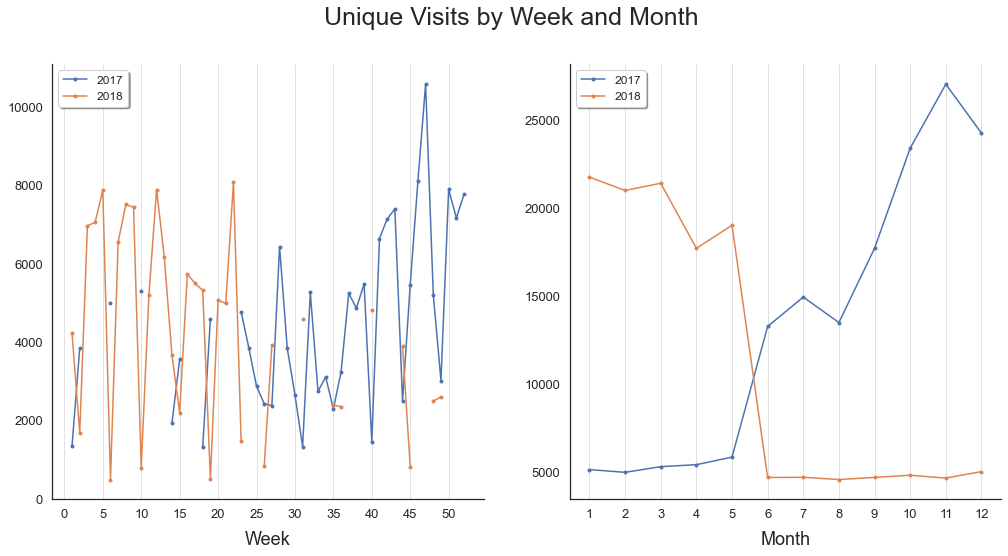

In [103]:
# Initializing Figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))

# Initial Plots
monthly_visits.plot(ax=ax[1], marker='.')
weekly_visits.plot(ax=ax[0], marker='.')

# Axis and Tick Settings
[ax[i].tick_params(axis='both', labelsize=13) for i in range(2)]
ax[0].xaxis.set_ticks(
    np.linspace(weekly_visits.index[0], weekly_visits.index[1]))
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_ticks(
    np.linspace(monthly_visits.index[0], monthly_visits.index[1]))
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))

# Figure settings
[ax[i].spines['right'].set_visible(False) for i in range(2)]
[ax[i].spines['top'].set_visible(False) for i in range(2)]
[ax[i].grid(axis='x', alpha=.6) for i in range(2)]

# Label settings
plt.suptitle('Unique Visits by Week and Month', size=25)
[
    ax[x].set_xlabel('{}'.format(y), labelpad=10, fontdict={'fontsize': 18})
    for x, y in zip(range(2), ['Week', 'Month'])
]
[
    ax[i].legend(fancybox=True, fontsize=12, shadow=True, title_fontsize=13)
    for i in range(2)
]

plt.show()

While some data are present for each year, it seems like most of the points from the first 6 months come from 2018 while the later months come from 2017. The distributions of visitors per week reflects the previously calculated average however, the distribution of it varies greatly with ranges from around 1,000 to 8,000. Also, the month for 2017 showed an increasing trend whilst the next year showed the opposite indicating an overall relative decline in unique visitors to the site. Lastly, the weekly distributions indicate that the high differences seen in the monthly visitor averages may not be as wide due to the higher volatility in weekly visits for both 2017 and 2018.

Let's see how the averages look for daily unique visitors.

In [26]:
daily_visits = visits.groupby(['start_year',
                               'start_date']).nunique()['Uid'].unstack(0)

In [27]:
round(daily_visits.agg(['mean', 'median']).transpose(), 2)

,mean,median
2017,845.28,795.5
2018,997.46,992.0


When looking at the unique visitors by day, the year 2018 shows a greater count with a mean of 997 and median of 992 unique visitors; in comparison, the year 2017 falls < 140 and < 100 visitors with an average of 845 visitors and a median of 795 unique visitors, respectively.

To get a better view of the distributions as well as change over time amongst the daily visitors for the two years, we'll use a line chart. 

In [111]:
daily_visits[2017].index[0]

datetime.date(2017, 1, 6)

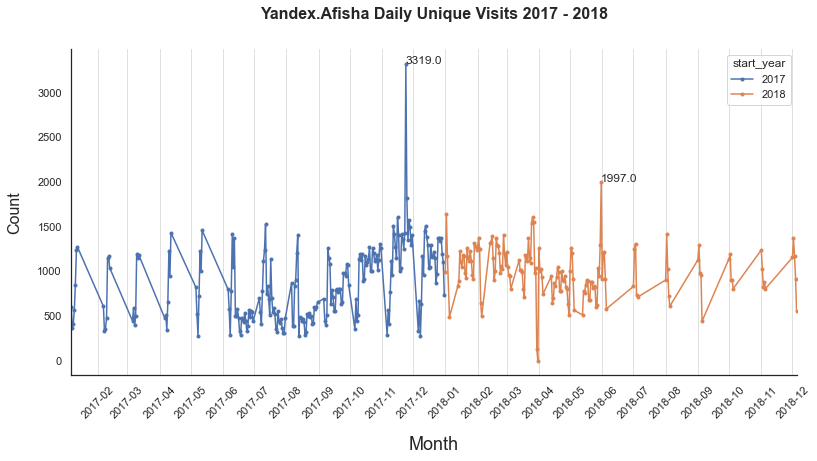

In [115]:
fig, ax = plt.subplots(figsize=(13, 6))

daily_visits.plot(ax=ax, marker='.')

#axis and tick settings
plt.xlim(daily_visits[2017].index[0],daily_visits[2018].index[-1])
ax.xaxis.set_major_locator(MonthLocator())
ax.tick_params(axis='x', rotation=45)

#label settings
plt.xlabel('Month', fontsize=18, labelpad=15)
plt.ylabel('Count', fontsize=16, labelpad=15)
ax.set_title('Yandex.Afisha Daily Unique Visits 2017 - 2018',
             fontdict={
                 'fontsize': 16,
                 'fontweight': 'bold'
             },
             pad=30)

#text annotations
ax.text(x=daily_visits.sort_values([2017], ascending=False).index[0],
        y=daily_visits.max().values[0],
        s=daily_visits.max().values[0])
ax.text(x=daily_visits.sort_values([2018], ascending=False).index[0],
        y=daily_visits.max().values[1],
        s=daily_visits.max().values[1])

#spines and grid settings
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(axis='x', alpha=.6)

plt.show()

The graph confirms the finding earlier regarding the distribution of points centering at the beginning months for the year 2018 and later months for the year 2017. In addition, it also seems that 2018 saw a slight decrease in it's later months but not by much as show in the month chart. The later peak of the November peak of 2017 is likely the reason for the high average differences in month. The reasons of this can be many but we'll leave this for another analysis. Overall though, volatility is still present in the visitor counts to the site with most points falling around the count ranges of 500 to 1,500. Lastly, 2018 does indeed show a slightly higher average in daily visits since most of it's points fall on average higher than those in 2017.

Could the device type have some influence over the counts seen earlier? We'll create another dataframe that splits by device and takes their appropriate total daily visit count to figure this out.

In [29]:
visits_device = visits.groupby(['Device',
                                'start_date']).count()['Uid'].reset_index()
visits_device.sample(3)

,Device,start_date,Uid
134,desktop,2017-09-28,907.0
19,desktop,2017-03-11,920.0
642,touch,2018-03-28,250.0


We'll plot the two variables using a line chart.

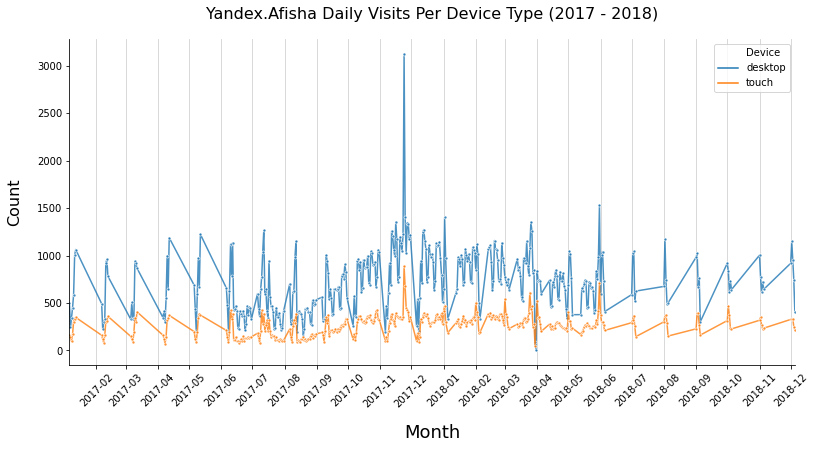

In [30]:
fig, ax = plt.subplots(figsize=(13, 6))
sns.lineplot(visits_device['start_date'],
             visits_device['Uid'],
             hue=visits_device['Device'],
             alpha=.8,
             marker='.')

#Axis and tick settings
ax.xaxis.set_major_locator(MonthLocator())
ax.tick_params(axis='x', rotation=45)
plt.xlim(visits['start_date'].min(), visits['start_date'].max())

#Label settings
plt.xlabel('Month', fontsize=18, labelpad=15)
plt.ylabel('Count', fontsize=16, labelpad=15)
ax.set_title('Yandex.Afisha Daily Visits Per Device Type (2017 - 2018)',
             fontdict={
                 'fontsize': 16,
                 'fontweight': 'medium'
             },
             pad=20)

#Spines and grid settings
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(axis='x', alpha=.6)

plt.show()

Clearly, most of Yandex.Afisha's U.S. visitors access the site via a desktop device rather than through their mobile phones. The trends also seem to follow the same patterns as the daily visits indicating no change in device type usage over the years. The company should look into this more as it would have been more likely that mobile users visit the site. According to data that Perficient.com pulled from SimilarWeb, a market intelligence company (click <a href='https://www.perficientdigital.com/insights/our-research/mobile-vs-desktop-usage-study'>here</a> for reference), the aggregate stats show that on aggregate for the years of 2017 and 2018, mobile devices made up a bigger portion of site visits(63%-2017 and 58%-2018) in comparison to desktop site visits (37%-2017 and 42%-2018). Therefore, there might be some other factors (ie. mobile website issues) involved that have contributed to the noticeable device difference.

We'll check how the ratio differs, if any, amongst the months to confirm the earlier finding--no apparent difference amongst device usage over the two years.

In [31]:
(visits.query("Device =='desktop'").groupby(['start_year', 'start_month'
                                             ]).nunique()['Uid'] /
 visits.groupby(['start_year', 'start_month']).nunique()['Uid']).unstack(0)

start_year,2017,2018
start_month,,
1,0.720939,0.727962
2,0.721689,0.707148
3,0.718797,0.708571
4,0.736057,0.693219
5,0.730343,0.695960
6,0.735642,0.709520
7,0.721984,0.721221
8,0.729460,0.697756
9,0.711723,0.712314


The output shows users who access the site on their desktops make up roughly 70% of the share of total site visits with little to no changes over the years and month. This will be of particular interest for the company.

Now we return back to the years to assess for how user engagement has fared over time and if it's improving. To accomplish this, the following loop will be iterated over the two years to take calculate the following metrics for user engagement:
- Basic User Engagement Metrics: Unique amount of users who are active (here, defined as accessing the website), within a given amount of time.
    - Daily Active Users (DAU)  
    - Weekly Active Users (WAU)
    - Monthly Active Users (MAU)
- Stickiness: to assess user's loyalty/retention rate in terms of the average daily visits over a period of time (week or month).
    - DAU/WAU ratio 
    - DAU/MAU ratio

NOTE: This is only relevant up to the particular date measured. This is just to report some vanity metrics.

In [32]:
for i in ['2017', '2018']:
    visits_year = visits.query("start_year== @i")
    dau = visits_year.groupby('start_date').agg({'Uid': 'nunique'}).median()
    wau = visits_year.groupby(['start_week']).agg({'Uid': 'nunique'}).median()
    mau = visits_year.groupby(['start_month']).agg({'Uid': 'nunique'}).median()
    sticky_wau = dau / wau
    sticky_mau = dau / mau

    print(i, '\nMedian Unique Daily Active Users:', int(dau), '\n',
          'Median Unique Weekly Active Users:', int(wau), '\n',
          'Median Unique Monthly Active Users:', int(mau))
    print(i, '\nSticky WAU:', round((sticky_wau[0] * 100), 2), '%',
          '\nSticky MAU:', round((sticky_mau[0] * 100), 2), '%')
    print('---------------------------------------------------------')

2017 
Median Unique Daily Active Users: 795 
 Median Unique Weekly Active Users: 4229 
 Median Unique Monthly Active Users: 13397
2017 
Sticky WAU: 18.81 % 
Sticky MAU: 5.94 %
---------------------------------------------------------
2018 
Median Unique Daily Active Users: 992 
 Median Unique Weekly Active Users: 4589 
 Median Unique Monthly Active Users: 4936
2018 
Sticky WAU: 21.62 % 
Sticky MAU: 20.1 %
---------------------------------------------------------


When we look at the DAU and WAU, 2018 seems to be faring slightly better than 2017 but this isn't the case for the MAU in which 2017 trumps the user count in 2018. This MAU most likely was impacted by the amount of quantity that November,2017 had (3,319 visits in just one day) which most likely was just a one time-stop to the site. ->  When looking at the sticky factors, 2018 is shown to have the most loyalty engagement(user retention) with an average of &#8773; 20%. So,the average user visits your site  1.4 days out a week and 6 days out of a month. More info, will be needed to interpret the sticky factors as different factors dictate the 'goodness' of the ratio seen.

Let's calculate how the sticky factors look for the years overall. 

In [33]:
dau = visits.groupby('start_date').agg({'Uid': 'nunique'}).median()
wau = visits.groupby(['start_year', 'start_week']).agg({
    'Uid': 'nunique'
}).median()
mau = visits.groupby(['start_year', 'start_month']).agg({
    'Uid': 'nunique'
}).median()

print('Median Unique Daily Active Users:', int(dau), '\n',
      'Median Unique Weekly Active Users:', int(wau), '\n',
      'Median Unique Monthly Active Users:', int(mau))
print('\nSticky WAU:', round(((dau / wau)[0] * 100), 2), '%', '\nSticky MAU:',
      round(((dau / mau)[0] * 100), 2), '%')

Median Unique Daily Active Users: 921 
 Median Unique Weekly Active Users: 4589 
 Median Unique Monthly Active Users: 9574

Sticky WAU: 20.07 % 
Sticky MAU: 9.62 %


Not suprisingly, the Sticky MAU factor seems to differ on the whole. The company should look closer into the MAU for both users as their might have been other factors involved.

We'll now shift our attention to observe how to assess the retention and churn rate for the company. We'll start by converting the date into a year-month format and use that column to retrieve the minimum month. 


In [34]:
visits['dates'] = visits['Start Ts'].apply(lambda x: x.strftime('%Y-%m'))

first_visit_month=visits.groupby('Uid')[['dates']].min().reset_index()
first_visit_month.columns = ['Uid', 'first_month']

first_visit_month.head(2)

,Uid,first_month
0,11863502262781,2018-01
1,49537067089222,2018-06


We'll merge the first visit months and merge it with it's appropriate user. 

In [35]:
print(len(visits))
visits=visits.merge(first_visit_month,validate='m:1')

print(len(visits))
print(visits.head(2))

358532
358532
                    Uid   Device              End Ts  Source Id  \
0  16879256277535980062    touch 2017-12-20 17:38:00          4   
1    104060357244891740  desktop 2018-02-19 17:21:00          2   

             Start Ts  start_date  start_week  start_month  start_year  \
0 2017-12-20 17:20:00  2017-12-20          51           12        2017   
1 2018-02-19 16:53:00  2018-02-19           8            2        2018   

     dates first_month  
0  2017-12     2017-12  
1  2018-02     2018-02  


The next approach we'll take is to create a function that will subtract the recorded year with the first recorded year and multiply it by 12. This number will then be used to adjust the recorded month data into a 24 month format which will be useful when calculating the retention and churn rates later.


In [37]:
def adj_month(df,date, s_year, month):
    year = pd.to_datetime(df[date]).dt.year
    adj = (df[s_year] - year)*12
    adj_month = df[month] + adj
    return adj_month

Then we'll create the adjusted month column using the function.


In [38]:
visits['adj_month'] = adj_month(visits,'first_month','start_year','start_month')
visits['adj_month'].sort_values()

233511     1
134060     1
300895     1
300906     1
239567     1
          ..
88658     24
100713    24
34036     24
30530     24
26029     24
Name: adj_month, Length: 358532, dtype: int64

With the columns set up, we'll proceed and form the cohorts based of the first recorded visit month.


In [39]:
monthly_cohort_visits=visits.groupby(['first_month','adj_month']).agg({'Uid':'nunique'})
monthly_cohort_visits.tail()

Uid
first_month adj_month      
2018-10     11           64
            12           29
2018-11     11         2720
            12           65
2018-12     12         2877

We'll then create a function that will be used to return the cohort lifetime of each cohort.


In [40]:
def cohort_period(df):

    df['cohort_lifetime'] = np.arange(len(df))
    return df


Using the function we'll add the lifetime column to the dataframe and then place that column as the level 1 index.


In [41]:
monthly_cohort_visits=monthly_cohort_visits.groupby(level=0).apply(cohort_period).reset_index()
print(monthly_cohort_visits.head(2))

monthly_cohort_visits.set_index(['first_month','cohort_lifetime'],inplace=True)
print(monthly_cohort_visits.head(2))

  first_month  adj_month   Uid  cohort_lifetime
0     2017-01          1  5153                0
1     2017-01          2   349                1
                             adj_month   Uid
first_month cohort_lifetime                 
2017-01     0                        1  5153
            1                        2   349


Next, we'll apply the <b>.first()</b> pandas dataframe method in order to retrieve the first value for each cohort (level 0 index).


In [42]:
cohort_size=monthly_cohort_visits.groupby(level=0).first()
cohort_size.head(2)

,adj_month,Uid
first_month,,
2017-01,1,5153
2017-02,2,4649


Now let's calculate the retention rate by dividing each cohort's existing monthly visitors with it's corresponding total cohort group size.


In [43]:
retention_rate = monthly_cohort_visits['Uid'].unstack(1).divide(cohort_size['Uid'],axis=0)
retention_rate.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
first_month,,,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.067728,0.057636,0.056666,0.054337,0.088104,0.086746,0.091209,0.101494,0.134291,...,0.067922,0.055890,0.059383,0.026198,0.026586,0.022899,0.026586,0.027557,0.027557,0.03105
2017-02,1.0,0.046031,0.039148,0.034416,0.058077,0.064315,0.061949,0.083244,0.100022,0.105614,...,0.042805,0.042160,0.014842,0.013336,0.012691,0.015057,0.014842,0.013766,0.013336,NaN
2017-03,1.0,0.040965,0.034934,0.051778,0.060719,0.051986,0.070701,0.088792,0.089208,0.064878,...,0.034103,0.011229,0.008110,0.011021,0.011853,0.013308,0.010605,0.011437,NaN,NaN
2017-04,1.0,0.045359,0.053759,0.055859,0.053969,0.062789,0.076228,0.092188,0.069509,0.044099,...,0.010710,0.007770,0.011130,0.009660,0.011340,0.012180,0.012600,NaN,NaN,NaN
2017-05,1.0,0.065291,0.054773,0.051994,0.059139,0.069657,0.088311,0.061123,0.040881,0.040881,...,0.008930,0.006747,0.009526,0.007541,0.011113,0.011113,NaN,NaN,NaN,NaN


Then graph the retention rates via a heatmap.


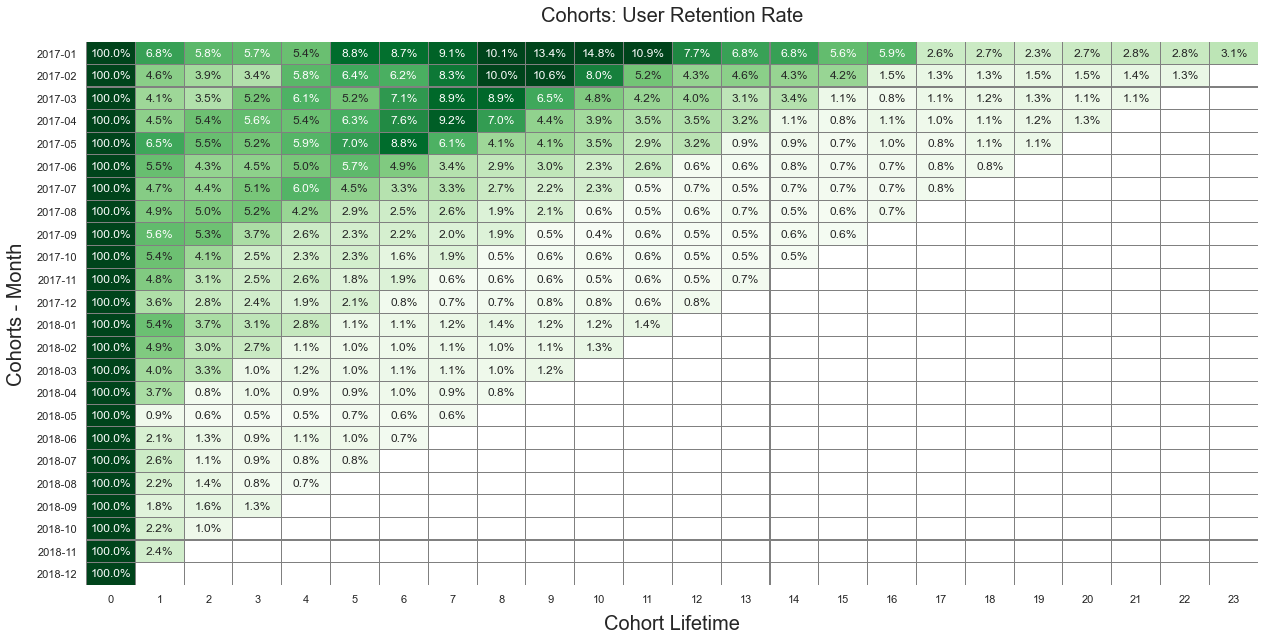

In [44]:
sns.set(style='white')

fig, ax = plt.subplots(figsize=(21, 10))
sns.heatmap(retention_rate,annot=True,
            vmax=.1, fmt='.1%', linewidths=.05,cbar=False,
            linecolor='gray', cmap="Greens", ax=ax)

plt.title('Cohorts: User Retention Rate', fontsize=20, pad=20)
plt.ylabel('Cohorts - Month', size=20, labelpad=10)
plt.xlabel('Cohort Lifetime', size=20, labelpad=10)

plt.show()

Using 10% as the max rate, per the graph, over the same relative time retention rates for the company is slowly decreasing. Users whose first recorded monthly visit fell between Jan-May 2017, showed a recorded increase in their 4th through 12th monthly lifetime. If we compare down for the month of June, the retention rates doesn't reflect such a change; rather, the retention rates are decreasing in comparison to its previous month. Lastly, the first month retention rates also seem to indicate a decrease in user retention rates.



Does the churn rates show similar patterns? We'll use the <b>pct.change()</b> method and apply it to the columns axis to retrieve the relative percentage change over the previous lifetime--churn rate over each cohort's lifetime.


In [45]:
user_churn_rate = monthly_cohort_visits.unstack(1)['Uid'].pct_change(axis=1)
user_churn_rate.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
first_month,,,,,,,,,,,,,,,,,,,,,
2017-01,NaN,-0.932272,-0.148997,-0.016835,-0.041096,0.621429,-0.015419,0.051454,0.112766,0.323136,...,0.005747,-0.177143,0.062500,-0.558824,0.014815,-0.138686,0.161017,0.036496,0.00000,0.126761
2017-02,NaN,-0.953969,-0.149533,-0.120879,0.687500,0.107407,-0.036789,0.343750,0.201550,0.055914,...,-0.065728,-0.015075,-0.647959,-0.101449,-0.048387,0.186441,-0.014286,-0.072464,-0.03125,0.000000
2017-03,NaN,-0.959035,-0.147208,0.482143,0.172691,-0.143836,0.360000,0.255882,0.004684,-0.272727,...,0.115646,-0.670732,-0.277778,0.358974,0.075472,0.122807,-0.203125,0.078431,0.00000,0.000000
2017-04,NaN,-0.954641,0.185185,0.039062,-0.033835,0.163424,0.214047,0.209366,-0.246014,-0.365559,...,-0.662252,-0.274510,0.432432,-0.132075,0.173913,0.074074,0.034483,0.000000,0.00000,0.000000
2017-05,NaN,-0.934709,-0.161094,-0.050725,0.137405,0.177852,0.267806,-0.307865,-0.331169,0.000000,...,-0.042553,-0.244444,0.411765,-0.208333,0.473684,0.000000,0.000000,0.000000,0.00000,0.000000


Now we'll apply the following for loop to create a list of False values per row. It starts with 0 False values and increase by 1 per loop and ends with 23 False values. This will be used to not show any data for the heatmap where appropriate. 


In [46]:
masks =[]
for i in list(range(24,0,-1)):
    x = [True for x in range(i)]
    y = [False for x in range(24-i)]
    x.extend(y)
    masks.append(x)

masks =user_churn_rate == masks
masks.tail(10)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
first_month,,,,,,,,,,,,,,,,,,,,,
2018-03,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2018-04,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
2018-05,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-06,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-07,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-08,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-10,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-11,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Again, we'll use a heatmap to visualize our churn rates per monthly cohort. 

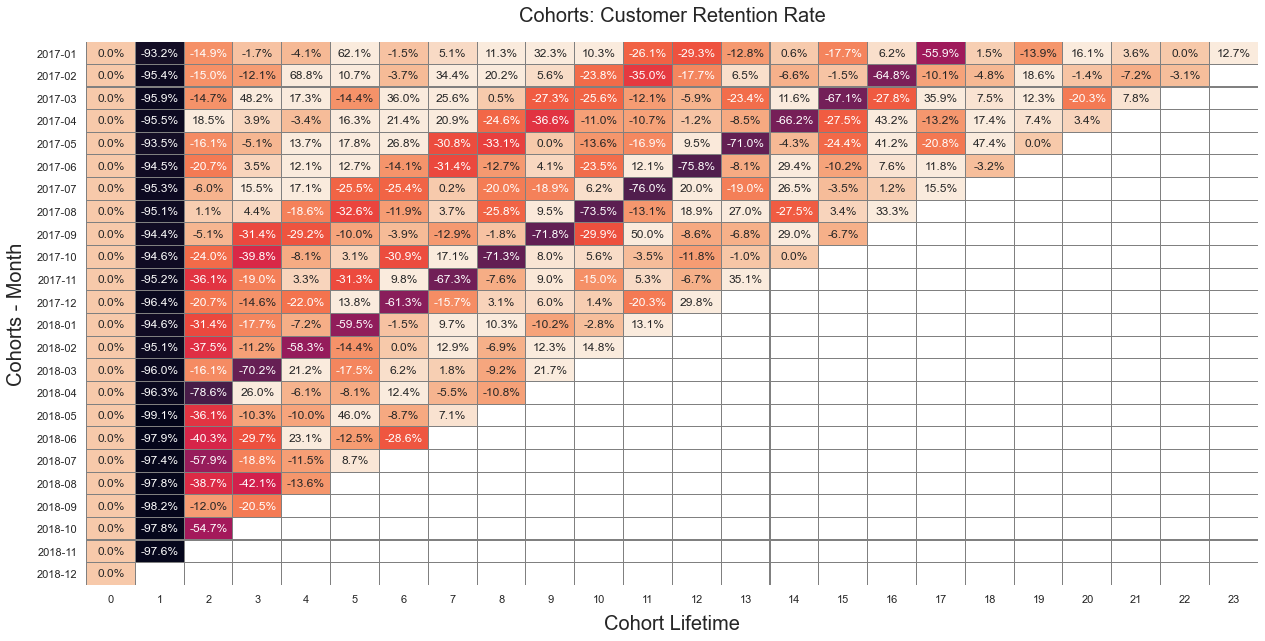

In [47]:
sns.set(style='white')

fig, ax = plt.subplots(figsize=(21,10))

sns.heatmap(user_churn_rate.fillna(0),annot=True,
            vmax=.1, fmt='.1%', linewidths=.05,mask=masks,cbar=False,
            linecolor='gray' , ax=ax)

plt.title('Cohorts: Customer Retention Rate', fontsize=20, pad=20)
plt.ylabel('Cohorts - Month', size=20, labelpad=10)
plt.xlabel('Cohort Lifetime', size=20, labelpad=10)

plt.show()


Note: the light colors show positive rates. When looking at the first month, the churn rates show a bad sign for the company with all of them in the high 90% churn rate. Most of the churn rates for users who first visited in the first months of 2017 also seem to fair well; around 1/3 of the values show positive churn rates. The users who started visiting the company's site in 2018 on the other hand, show relatively high churn rates with most of them being negative values 

Let's now shift our attention toward the sessions per user amongst the years. We'll start by looking at the median number of sessions per day for each year.

In [48]:
print(
    'Median User Sessions per Day',
    round(
        visits.groupby(['start_year', 'start_date']).agg({
            'Uid': 'count'
        }).unstack(level=0).median()))

Median User Sessions per Day      start_year
Uid  2017           853.0
     2018          1070.0
dtype: float64


2018 has the higher aggregate of median sessions which is not surprising given the findings earlier. Let's check if there is a difference amongst the sessions per user for each year. 

In [49]:
sessions_per_user = visits.groupby(['start_year', 'start_date'
                                    ]).agg({'Uid': ['count', 'nunique']})

sessions_per_user.columns = ['n_sessions', 'n_users']

sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / \
    sessions_per_user['n_users']

print(round(sessions_per_user.unstack(0).agg('median'), 2))
print('--------------------------------------------')
print(round(sessions_per_user.median(), 2))

                   start_year
n_sessions         2017           853.00
                   2018          1070.00
n_users            2017           795.50
                   2018           992.00
sessions_per_user  2017             1.07
                   2018             1.08
dtype: float64
--------------------------------------------
n_sessions           999.50
n_users              921.00
sessions_per_user      1.08
dtype: float64


Overall, it's fair to say that the average unique user uses the site only once per day. There's obviously room for improvement here. 

Knowing that their is roughly one session per day per user over the years, we'll take a look at how many minutes a user spends on the site. We'll plot a histogram from it to observe the distribution.

In [50]:
# sessions length per day
session_length = (visits['End Ts'] - visits['Start Ts']).dt.seconds / 60
session_length.sample(3)

28438     28.0
168160     4.0
74471      6.0
dtype: float64

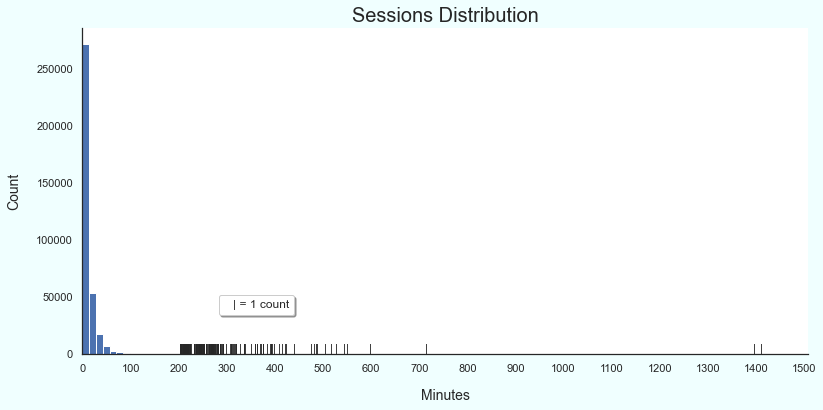

In [51]:
fig, ax = plt.subplots(figsize=(13, 6), facecolor='azure')

session_length.hist(bins=100, ax=ax)

#Axis and tick settings
plt.xlim(0, session_length.max() + 100)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

#Text annotation
for v in session_length[session_length > 200].values:
    ax.text(v, 2500, '|')
    
#Spine settings    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Label settings
plt.xlabel('Minutes', fontsize=14, labelpad=15)
plt.ylabel('Count', fontsize=14, labelpad=15)
plt.title('Sessions Distribution', size=20)

plt.legend(['| = 1 count'],
           bbox_to_anchor=(0.3, -.8, 0, 1),
           fancybox=True,
           fontsize=12,
           handlelength=0,
           shadow=True,
           title_fontsize=13)

plt.grid(False)

There seems to be some extreme outliers as indicated by the histogram's long right tail. Sessions with minutes longer than 200 minutes (or 3 hours and 20 minutes) were marked with a '|' for visualization purposes. When considering the possible context behind the sessions length  it seems likely that some users may have left the tab open for the given amount of time; 243 hours (1,400) on a site though, is unlikely. To get a more accurate view of the sessions length distribution we'll take into account only those users who spent less than 30 minutes with the site--this number was chosen as the cutoff to show the median in seconds.

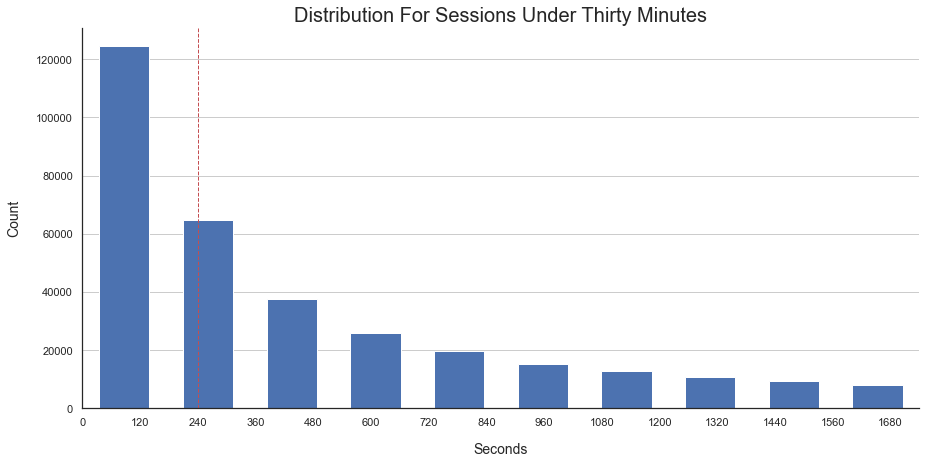

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))

under_thirty_mins = session_length[session_length < 30].apply(lambda x: x * 60)
under_thirty_mins.hist(rwidth=.6, align='mid', ax=ax)

plt.axvline(under_thirty_mins.median(),
            color='r',
            linestyle='dashed',
            linewidth=1)
#Spines and axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0, under_thirty_mins.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(120))

#Label
plt.xlabel('Seconds', fontsize=14, labelpad=15)
plt.ylabel('Count', fontsize=14, labelpad=15)
plt.title('Distribution For Sessions Under Thirty Minutes', fontsize=20)

ax.grid(axis='x')
plt.show()

For users who spend less than 30 minutes, the median stay lasts around 240 seconds or 4 minutes with the majority of users staying in the site for under two minute. The sessions lengths for the day are relatively low; maybe they didn't find the content that they were looking for. 

Let's get one last aggregate stats from the session length to have a further look into it.

In [53]:
[
    i + ': ' + str(round(float(session_length.apply(i)), 2))
    for i in ['mean', 'std', 'mode', 'median', 'min', 'max']
]

['mean: 10.75',
 'std: 16.95',
 'mode: 1.0',
 'median: 5.0',
 'min: 0.0',
 'max: 1408.0']

The stats reflect the histogram plotted out earlier in which some extreme outliers have driven the mean to the right. Therefore, for the sessions length we'll use the median given that it's relatively similar for the overall and under 30 minutes sessions. 

### Product Summary
>1. <u>How many people visit the site every day, week, and month? </u>
    -  Median Unique Daily Active Users: 921 
    - Median Unique Weekly Active Users: 4589 
    - Median Unique Monthly Active Users: 9574
    - Desktop users over the years make up 70% of unique users to the site
    - 2018 fairs slightly better in terms of DAU and WAU with the exception of MAU of which has been influences by 2017's month of November (3,319 users visit on a single day).
    
>2. <u>How many sessions are there per day? </u>
    - Roughly 1.08 sessions per day
    
>3. <u> What is the length of each session? </u>
    - Around 5 minutes per session
    
>4. <u>How often do users come back?</u>
    - Roughly speaking, the average active user come back to the site 1.4 day out of the week and 6 days out of a month. 2018 users on the whole, showed slightly higher monthly engagement with the site. This difference was not seen on a weekly basis..
    - For users whose first recorded visit was in 2017, retention rates (> 10%) show that they usually visit the site between June to December. However, most don't stay after those months, with such retention rates falling below the 5% range. For relatively recent/new users (2018), no such observations were found indicating a need for the company to create a better retention strategy.
    - Churn rates for recent visitors to the site in comparison to the previous year show that there are less and less users retained over time.
    - Overall churn rates in the first lifetime, regardless of cohort, show high churn rates > -93%. 
    - In a nutshell, Yandex.Afisha's active users come back to the site 1 day out of the week. 
    
---------------------------------------------------------

### Sales 1. 2
1. When do people start buying? 
2. How many orders do they make during a given period of time? 
3. What is the average purchase size? 
4. How much money do they bring? (LTV) 

Some thing to note before proceeding. The device comparisons will not be used here as its not necessary to answer the questions; it also may not necessarily reflect the actual device a user used when making a purchase. To start we're interested to see the difference in time between the user's first logged visit and their purchase time in the dataset.  We'll save the unique user id of those who made an order and retrieve only these ids from the visits dataframe. The minimum log datetime will then be taken for each. 

In [54]:
order_ids = list(orders['Uid'].unique())
first = visits.query("Uid in @order_ids").groupby(
    ['Uid'])['Start Ts'].min().reset_index()
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36509 entries, 0 to 36508
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Uid       36509 non-null  uint64        
 1   Start Ts  36509 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 570.6 KB


In [55]:
orders['Uid'].count(), orders['Uid'].nunique(), first['Uid'].count(
), first['Uid'].nunique()

(50364, 36509, 36509, 36509)

The orders columns match with the unique count. We'll now proceed to merge the dataframe with the orders dataframe. From there we'll also make new columns for the calculations later on.

In [56]:
sales = orders.merge(first, on=['Uid'], how='inner')
sales.sample(2)

,Buy Ts,Revenue,Uid,Start Ts
33277,2018-01-17 13:44:00,1.47,15364476567133523391,2017-12-12 20:11:00
38439,2018-02-19 09:50:00,5.38,9147519783083544862,2018-02-19 09:12:00


In [57]:
sales['week'] = sales['Buy Ts'].apply(lambda x: x.strftime('%Y-%U'))
sales['month'] = sales['Buy Ts'].apply(lambda x: x.strftime('%Y-%m'))
sales['date'] = sales['Buy Ts'].dt.date
sales.sort_values(['Start Ts'], ascending=False)

,Buy Ts,Revenue,Uid,Start Ts,week,month,date
47917,2018-05-12 23:58:00,3.67,10062993776439983735,2018-12-05 23:41:00,2018-18,2018-05,2018-05-12
47915,2018-05-12 22:28:00,3.42,12165976957663189820,2018-12-05 22:22:00,2018-18,2018-05,2018-05-12
47913,2018-05-12 22:01:00,4.89,15611360504919500130,2018-12-05 21:57:00,2018-18,2018-05,2018-05-12
47914,2018-05-12 22:24:00,2.44,14744512810199589675,2018-12-05 21:52:00,2018-18,2018-05,2018-05-12
47946,2018-05-13 18:34:00,3.42,10202471643441104980,2018-12-05 21:48:00,2018-19,2018-05,2018-05-13
...,...,...,...,...,...,...,...
6679,2017-07-21 14:56:00,1.67,16945437833757229838,2017-01-06 01:18:00,2017-29,2017-07,2017-07-21
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-06 00:25:00,2017-22,2017-06,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-06 00:14:00,2017-22,2017-06,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-06 00:14:00,2017-22,2017-06,2017-06-01


If we take a look at the Buy Ts and Start Ts columns, a problem can be seen. The minimum logged visit time is more recent than the order time. This seems to be a problem as this is not logically possible and will be reported to our colleagues. Nonetheless, in order to inform our answer to the first question, we'll still calculate the differences in time but exclude those that have a negative difference. 

To compare the the times, we'll use the minimum purchase date (first order date) and compare it with the minimum visit date.

In [58]:
first_order = sales.groupby('Uid')['Buy Ts'].min().reset_index()

first_visit = sales.groupby('Uid')['Start Ts'].min().reset_index()

time_dif = first_order.merge(first_visit)
time_dif.head(3)

,Uid,Buy Ts,Start Ts
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-03-06 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-11-10 17:14:00


Notice, that the third row still shows an abnormality. We'll take care of these by filtering out those with a time difference in the negative. Before doing that though, let's find out how many of rows have been identified as negative

In [59]:
mask = (time_dif['Buy Ts'] - time_dif['Start Ts'])
print(time_dif[(mask) < pd.Timedelta(0)].head(2))
print('---------------------------------------------')
print((time_dif[(mask) < pd.Timedelta(0)]).apply(len)['Uid'], len(time_dif))

                Uid              Buy Ts            Start Ts
2  2429014661409475 2017-10-11 18:33:00 2017-11-10 17:14:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 11:22:00
---------------------------------------------
5233 36509


So, it seems that out out the 36,500 users, 5,713 (or 15.6%) of their time to purchase show abnormalities. We'll take a note of this. Now, using the filter mask, we'll filter out for those with a 0 and above time difference and perform the necessary calculations. 

In [60]:
time_dif = time_dif[mask > pd.Timedelta(0)]['Buy Ts'] - time_dif[
    mask > pd.Timedelta(0)]['Start Ts']
[
    "{}: {}\n".format(i, time_dif.apply(i))
    for i in ['mean', 'median', 'max', 'mode']
]

['mean: 61 days 10:30:17.116558\n',
 'median: 0 days 23:15:00\n',
 'max: 508 days 16:47:00\n',
 'mode: 0   00:01:00\ndtype: timedelta64[ns]\n']

On average, a paying user will take 61 days from their first visit time to make an order and can go up to 508 days from making that first purchase. If we look at the median and mode, it seems more likely that an average user will take around 23 hours to make their first purchase with the most doing so within a minute. The numbers above may reflect the real difference between the first logged visit time and purchase time but given the abnormalities shown above, the stats will be taken with caution. 

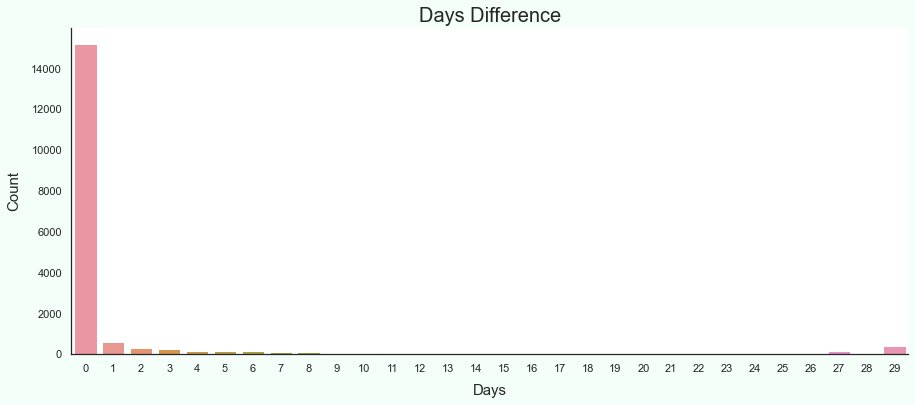

0     0.502095
1     0.020620
29    0.013032
dtype: float64


In [116]:
fig, ax = plt.subplots(figsize=(15, 6),facecolor='mintcream')

sns.countplot(
    time_dif[time_dif.apply(lambda x: x.days) < 30].apply(lambda x: x.days),
    ax=ax)

#Spine settings
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Label settings
plt.title('Days Difference', fontsize=20)
plt.xlabel('Days', size=15, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)

plt.show()

print((time_dif[time_dif.apply(lambda x: x.days) < 30].apply(
    lambda x: x.days).value_counts() / len(time_dif)).head(3))

If we take the first 30 days in time difference the graph shows that the visit time does indeed to occur in the same day with some occasional buys after the first day. However, first day buys make up around 50% of the recorded day differences which makes sense given the median of 23 hours. Given the abnormalities seen earlier a revised analysis is needed here.

To take a deeper look into the user purchase patterns, we'll now shift our attention to the orders dataframe and thus drop the visits columns.

In [62]:
sales.drop(columns=['Start Ts'], inplace=True)

Let's take a look at how the distribution of the time of purchase by using a frequency plot. 

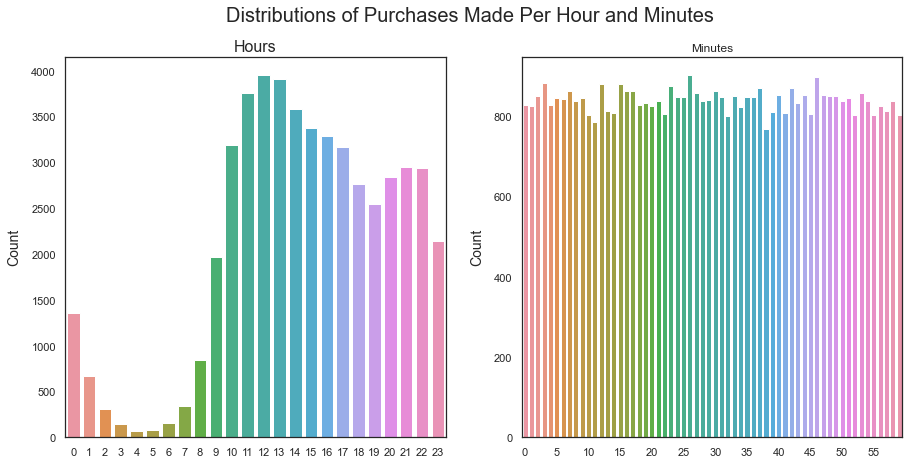

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.countplot(orders['Buy Ts'].apply(lambda x: x.hour), ax=ax[0])
sns.countplot(orders['Buy Ts'].apply(lambda x: x.minute), ax=ax[1])

#Tick and axis
ax[1].tick_params(axis='x')
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].set_xticklabels(range(-5, 60, 5))

#Labels
ax[0].set_title('Hours', fontsize=16)
ax[1].set_title('Minutes')
plt.suptitle('Distributions of Purchases Made Per Hour and Minutes',
             fontsize=20)
[ax[i].set_ylabel('Count', size=14, labelpad=10) for i in range(2)]
[ax[i].set_xlabel('') for i in range(2)]

plt.show()

Paying users seem to make most of their purchases between 11am to 2pm and then gradually decrease their spending until 8-10pm which sees a short burn of spending. No significant minute preference was shown. 

Let's take a more outer look to observe how many orders are made within a day, week, and month.

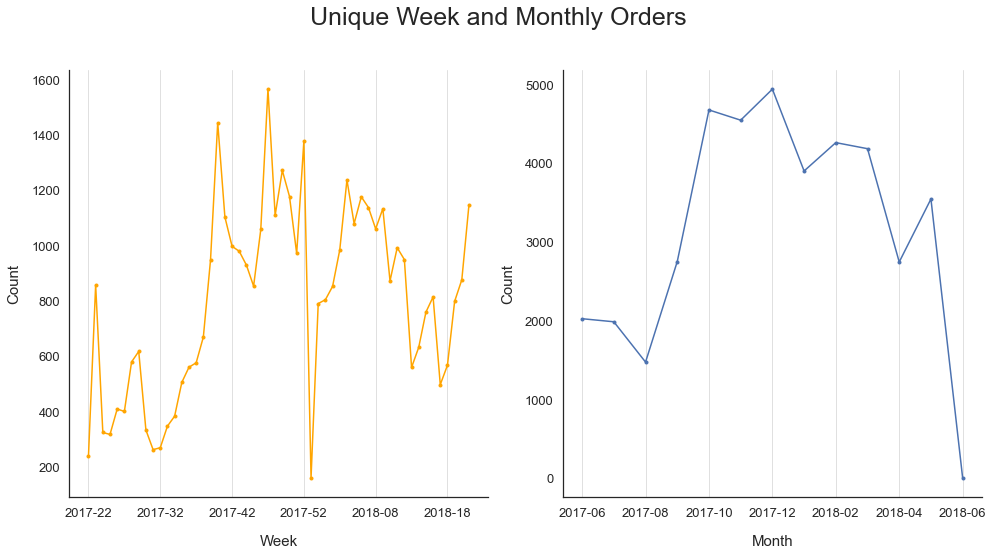

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sales.groupby('week').agg({
    'Uid': 'nunique'
}).plot(ax=ax[0], style='.-', legend=False, color='orange')
sales.groupby('month').agg({
    'Uid': 'nunique'
}).plot(ax=ax[1], style='.-', legend=False)

#Spines and tick
[ax[i].spines['right'].set_visible(False) for i in range(2)]
[ax[i].spines['top'].set_visible(False) for i in range(2)]
[ax[i].tick_params(axis='both', labelsize=13) for i in range(2)]


#Labels
ax[0].set_xlabel('Week', fontsize=15, labelpad=15)
ax[1].set_xlabel('Month', fontsize=15, labelpad=15)
[ax[i].set_ylabel('Count', fontsize=15, labelpad=10) for i in range(2)]
plt.suptitle('Unique Week and Monthly Orders', fontsize=25, y=1.1)

[ax[i].grid(axis='x', alpha=.6) for i in range(2)]
plt.tight_layout()

plt.show()

Users tend to make most of their orders around the very late to first months of the years, > 4,000 orders per month in Oct. to Mar., and not as much for the other months. This makes sense as the months of Nov-Jan. are filled with holidays and vacation time. In addition, over time, users look to be spending more as indicated by it's growing early 2018 month count. It should be noted that for the month graph, the last recorded month's (June 2018) count is most likely attributed to a very low presence of data points.

Let's take one last look at the amount of orders in terms of days. 

In [119]:
sales.groupby(['date']).count()['Uid'].index[0]

datetime.date(2017, 6, 1)

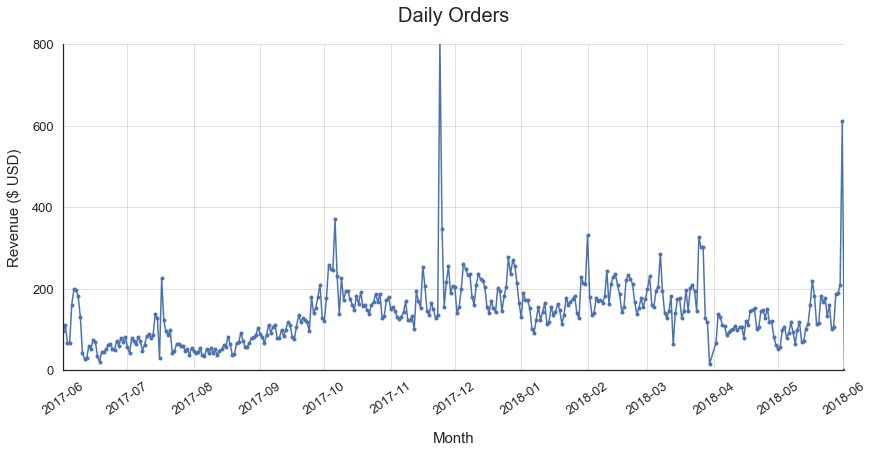

In [120]:
fig, ax = plt.subplots(figsize=(14, 6))

sales.groupby(['date']).count()['Uid'].plot(ax=ax, style='.-')

# Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Tick and axis
ax.tick_params(axis='both', labelsize=13)
ax.tick_params(axis='x', rotation=35)
plt.yticks(range(0, 801, 200))
plt.ylim(0, 800)
plt.xlim(sales.groupby(['date']).count()['Uid'].index[0], sales.groupby(['date']).count()['Uid'].index[-1])
ax.xaxis.set_major_locator(MonthLocator())

# Labels
ax.set_xlabel('Month', fontsize=15, labelpad=15)
ax.set_ylabel('Revenue ($ USD)', fontsize=15, labelpad=10)
plt.title('Daily Orders', fontsize=20, y=1.05)

ax.grid(axis='both', alpha=.6)
plt.show()

From the graph, the daily purchases made between the months of Oct.,2017 to Mar.,2018 fall between 200 orders per day with one day in Nov,2017 having a total purchase count of around 800. This seems to reflect the visits graph seen earlier and thus is most likely that some strong external force drove that big count. It is also shown that May, 2018 saw a wide spike of purchase count of around 600. Over time, the daily purchase count seems to slightly be increasing. 

Lastly, we'll calculate the conversion rate as well as the aggregate monthly and daily purchases stats to report it to the company.

In [66]:
visits.columns

Index(['Uid', 'Device', 'End Ts', 'Source Id', 'Start Ts', 'start_date',
       'start_week', 'start_month', 'start_year', 'dates', 'first_month',
       'adj_month'],
      dtype='object')

In [67]:
months = sales['month'].unique()
relevant_visits = visits.query("dates in @months")

In [68]:
#Conversion Rate
print(
    'Conversion Rate:',
    round(
        len(sales['Uid'].unique()) / len(relevant_visits['Uid'].unique()) *
        100, 3), '%')

#Purch per day
print('Purchases Made per Day', [
    "{} {}".format(i,
                   sales.groupby('date').count()['month'].apply(i))
    for i in ['mean', 'median', 'max', 'min']
])

#Purch per month
print('Purchases Made per Month', [
    "{} {}".format(i,
                   sales.groupby('month').count()['date'].apply(i))
    for i in ['mean', 'median', 'max', 'min']
])

Conversion Rate: 18.706 %
Purchases Made per Day ['mean 138.36263736263737', 'median 136.0', 'max 814', 'min 1']
Purchases Made per Month ['mean 3874.153846153846', 'median 4344.0', 'max 6206', 'min 1']


Of Yandex.Afisha's unique visitors from Jul.2017 to Jun.2018 only around 19% of them made a purchases. On average 138 purchases were made per day with one day in Nov.,2017 showing 814 purchases. On a monthly basis, an average of 3,874 of purchases were made with one month going up to 6,206 total purchases. 

To identify trends in retention, we'll create monthly cohorts.  This will be of use to the company as it will show them how well they're retaining their customers.

We'll start by getting the firsst purchase month for each unique visitor.

In [69]:
first_purchase_dates = sales.groupby('Uid')['month'].min().reset_index()
first_purchase_dates.columns = ['Uid', 'first_month']

sales = sales.merge(first_purchase_dates)
sales.head(3)

,Buy Ts,Revenue,Uid,week,month,date,first_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-22,2017-06,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-22,2017-06,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-22,2017-06,2017-06-01,2017-06


We'll then form our cohorts based on their first purchase month.

In [70]:
monthly_sales = sales.groupby(['first_month', 'month']).agg({
    'Uid': 'nunique',
    'Revenue': 'sum'
})
monthly_sales.head(4)

Uid  Revenue
first_month month                 
2017-06     2017-06  2022  9557.49
            2017-07    61   981.82
            2017-08    50   885.34
            2017-09    54  1931.30

We'll then add the cohort lifetime of each cohort.


In [71]:
monthly_sales = monthly_sales.groupby(level=0).apply(cohort_period)
monthly_sales.head(3)

Uid  Revenue  cohort_lifetime
first_month month                                  
2017-06     2017-06  2022  9557.49                0
            2017-07    61   981.82                1
            2017-08    50   885.34                2

The cohort lifetimes created will then be used in place of the month index.

In [72]:
monthly_sales.reset_index(inplace=True)
monthly_sales.set_index(['first_month', 'cohort_lifetime'], inplace=True)
monthly_sales.head(3)

month   Uid  Revenue
first_month cohort_lifetime                        
2017-06     0                2017-06  2022  9557.49
            1                2017-07    61   981.82
            2                2017-08    50   885.34

Now let's calcualte the retention rate by dividing each cohort's existing monthly visitors with it's corresponding total cohort group size.

In [73]:
# for each cohort take total sum of unique visitor
cohort_group_size = monthly_sales['Uid'].groupby(level=0).first()

# make the cohort lifetime into the columns
monthly_retention = monthly_sales['Uid'].unstack(1)

# divide each cohort lifetime values  by its correponding cohort group size
monthly_retention = monthly_retention.divide(cohort_group_size, axis=0)

monthly_retention.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,1.0,0.030168,0.024728,0.026706,0.043027,0.033136,0.030168,0.023244,0.028684,0.022255,0.022255,0.026212
2017-07,1.0,0.027055,0.029657,0.033299,0.025494,0.019771,0.018730,0.020291,0.021852,0.011446,0.013528,NaN
2017-08,1.0,0.042367,0.038714,0.032140,0.029218,0.023375,0.021914,0.032140,0.013879,0.022644,NaN,NaN
2017-09,1.0,0.050019,0.038387,0.028693,0.020163,0.024816,0.025591,0.014347,0.016673,NaN,NaN,NaN
2017-10,1.0,0.047465,0.028341,0.021198,0.021429,0.016590,0.012903,0.015438,NaN,NaN,NaN,NaN


With the monthly cohorts created, let's visualize how the retention rate for each of them via a heatmap.

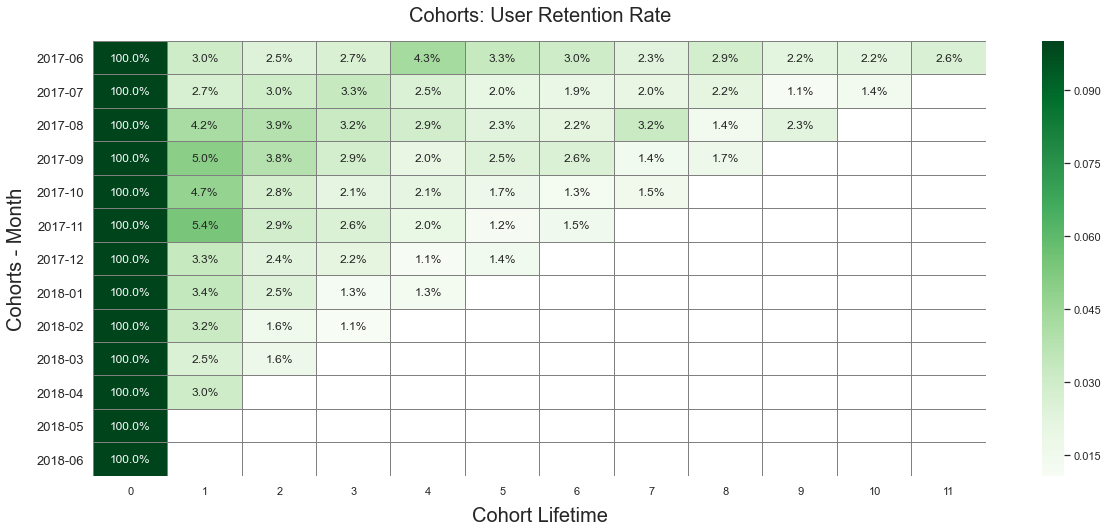

In [74]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 8))


sns.heatmap(monthly_retention,
            annot=True,
            vmax=.1,
            fmt='.1%',
            linewidths=.05,
            linecolor='gray',
            cmap="Greens",
            ax=ax)

ax.tick_params(axis='y', rotation=0, labelsize=13)

plt.title('Cohorts: User Retention Rate', fontsize=20, pad=20)
plt.ylabel('Cohorts - Month', size=20, labelpad=10)
plt.xlabel('Cohort Lifetime', size=20, labelpad=10)

plt.show()

The following applies for Jun,2017 up to April, 2018: The company over time is showing a slight decrease in it retention rate as show throughout the first 4 lifetimes per cohort. Not surprisingly, new customers from the months of Aug.,2017 and June., 2017 show the strongest retention rates. 2017's last few months' retention rates make sense as they fall around the holiday times. Summers and Winter seems to be the best time for the company in terms of retention rates. Lastly,the only concern is that 2018 is not showing as great strides but it may just be due to seasonality of which months we don't have data for.

Lastly, lets check how the churn rates look for the monthly cohorts.

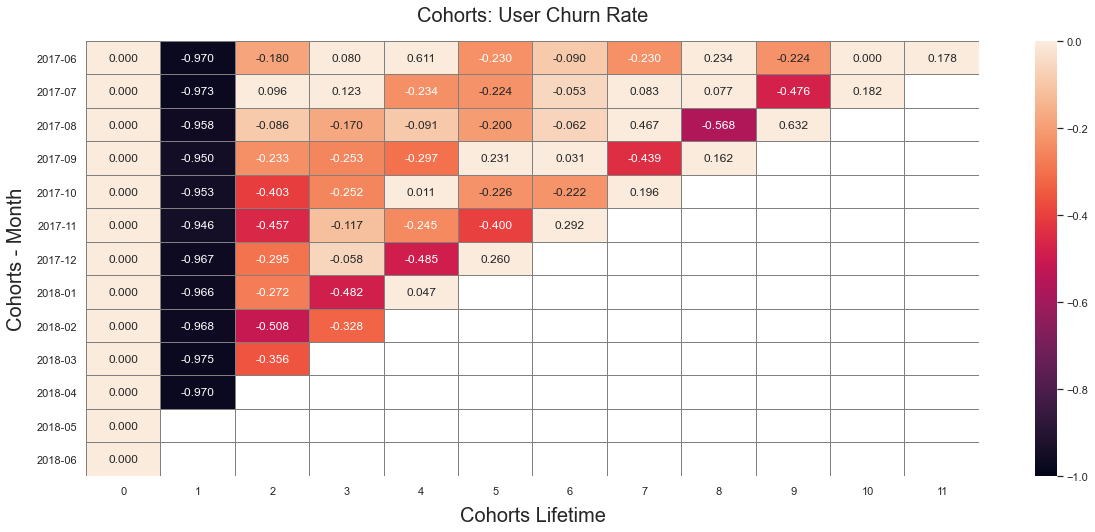

In [75]:
sns.set(style='white')
churn_rate = monthly_sales.unstack(level=1)['Uid'].pct_change(axis=1)

mask = churn_rate.iloc[1:, :] == 0
mask = (churn_rate.iloc[:1, :] == True).append(mask)

fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(churn_rate.fillna(0),
            annot=True,
            mask=mask,
            fmt='.3f',
            linewidths=.05,
            vmin=0,
            vmax=-1,
            linecolor='gray',
            ax=ax)

plt.title('Cohorts: User Churn Rate', fontsize=20, pad=20)
plt.ylabel('Cohorts - Month', size=20, labelpad=10)
plt.xlabel('Cohorts Lifetime', size=20, labelpad=10)

plt.show()

Again, the following applies for Jun,2017 up to April, 2018: Within the first month, on average, more than 95% of users churn, with the rates continuing to fall throughout the later months.  Of special notice, for Jun.,2017 to Aug.,2018 the churn rates seem to be relatively better than the last months in the order dataset. This may be due to the huge increase of buyers for the last months of 2017. However, for the months of 2018, another factor may have been involved; a further analysis is warranted due to the large percentages of decrease over their lifetimes.

We'll end this subsection by calculating some per-customer metrics in order to get the lifetime value per customer and average purchase size. Using the cohorts created, we'll retrieve the unique, total count, and total revenue per monthly cohort. 

In [76]:
metrics = sales.groupby(['first_month']).agg({
    'Uid': ['count', 'nunique'],
    'Revenue': 'sum'
})
metrics.columns = ['num_orders', 'unique_cust', 'total_rev']

metrics.head()

,num_orders,unique_cust,total_rev
first_month,,,
2017-06,4430,2022,24030.25
2017-07,2909,1922,16127.92
2017-08,2187,1369,11606.26
2017-09,3873,2579,34672.72
2017-10,6005,4340,27603.45


Then we'll calculate the relvant metrics which will be used to derive the average customer lifetime value (CLTV): 
- average purchase value per order (APV)
- average purchase frequency per customer (APFR)
- average monthly customer value (CV)
- average customer lifespan value

In [77]:
metrics['apv'] = metrics['total_rev'] / metrics['num_orders']
metrics['apfr'] = metrics['num_orders'] / metrics['unique_cust']
metrics['cv'] = metrics['apv'] * metrics['apfr']

In [78]:
round(metrics, 2)

,num_orders,unique_cust,total_rev,apv,apfr,cv
first_month,,,,,,
2017-06,4430,2022,24030.25,5.42,2.19,11.88
2017-07,2909,1922,16127.92,5.54,1.51,8.39
2017-08,2187,1369,11606.26,5.31,1.60,8.48
2017-09,3873,2579,34672.72,8.95,1.50,13.44
2017-10,6005,4340,27603.45,4.60,1.38,6.36
2017-11,5878,4078,26098.77,4.44,1.44,6.40
2017-12,5890,4380,33490.11,5.69,1.34,7.65
2018-01,4308,3373,16663.13,3.87,1.28,4.94
2018-02,4469,3651,16750.50,3.75,1.22,4.59


Of special notice, the month of Oct.2017 draws the most per customer value at \\$13.44 followed by Jun., 2017 with a CV of \\$11.88. Over the months, it's also shown that the total revenue, purchasing frequency, and CV is falling. Whether this should be expected warrants further investigation.

Lastly, we'll use the latest retention for each month to retrieve the churn rate (1-retention rate) in it's decimal/percentage form and divide 1 by that rate to retrieve the avg. monthly lifetime per cohort. 

In [79]:
def churn(x):
    return (1 / (1 - x[x.notnull()].values[-1]))

In [80]:
metrics['churn_month'] = monthly_retention.apply(lambda x: churn(x), axis=1)

C:\Users\garci\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [81]:
metrics.head()

,num_orders,unique_cust,total_rev,apv,apfr,cv,churn_month
first_month,,,,,,,
2017-06,4430,2022,24030.25,5.424436,2.190900,11.884397,1.026917
2017-07,2909,1922,16127.92,5.544146,1.513528,8.391217,1.013713
2017-08,2187,1369,11606.26,5.306932,1.597516,8.477911,1.023169
2017-09,3873,2579,34672.72,8.952419,1.501745,13.444250,1.016956
2017-10,6005,4340,27603.45,4.596744,1.383641,6.360242,1.015680


For the most part, most users churn within the first month which falls in line with the churn heatmap created earlier. Let's lastly multiply the average monthly lifetime by the avg. customer purchase value to get the avg. customer lifetime value.

In [82]:
metrics['clv'] = (metrics['cv'] * metrics['churn_month'])

We'll use all month except the last two months given that the they have only 1 month of recorded data. Let's take a look at the CLV.

In [83]:
metrics.iloc[:-2:][['churn_month', 'clv']]

,churn_month,clv
first_month,,
2017-06,1.026917,12.204292
2017-07,1.013713,8.506287
2017-08,1.023169,8.674335
2017-09,1.016956,13.672208
2017-10,1.015680,6.459970
2017-11,1.015438,6.498698
2017-12,1.014593,7.757728
2018-01,1.013522,5.006950
2018-02,1.010797,4.637458


The months of June and August come out as the highest yielding customer lifetime value. With the CLV decreasing over the given year and avg. lifetime, there's some indications for better retention strategies. 

Lastly, we'll print out relevant information that will be reported back to the company. To provide some confidence in the values calculated, we calculated the yearly revenue based off the avg. CLV and monthly avg. new paying users--multiplied by 12 to reflect the expected new customers in a year. 

In [84]:
avg_cltv = metrics['clv'].iloc[:-2].mean()
avg_uniq_cust = metrics['unique_cust'].mean()
avg_lifetime = metrics['churn_month'].iloc[:-2].mean()
purchase_frequency = metrics['apfr'].mean()

print(
    "CLV: {:.2f}\nAvg. Monthly New Paying Users: {:.0f}\nAvg. Customer Lifetime Value: {:.2f}"
    .format(avg_cltv, avg_uniq_cust, avg_lifetime))
print("Yearly and CLTV Revenue: {:,.0f}".format(
    (avg_cltv) * (avg_uniq_cust * 12)))
print("Actual Revenue: {:,.0f}".format(sales['Revenue'].sum()))

CLV: 7.67
Avg. Monthly New Paying Users: 2808
Avg. Customer Lifetime Value: 1.02
Yearly and CLTV Revenue: 258,328
Actual Revenue: 252,057


### Product Summary
>1. <u>When do people start buying? </u>
    - Roughly speaking, the average paying user takes around 23 hours (median) to go from a first-time visitor to a buyer.
    - The average paying user buys from the site mostly from 11 am to 2 pm of which buying count decrease over the next hours. This is followed by another wave of spending between 8 to 10 pm.
    
>2. <u>How many orders do they make during a given period of time?</u> and 3. <u> What is average purchase size? </u>
    - Of Yandex.Afisha's unique visitors from Jul.2017 to Jun.2018 only around 19% of them made a purchases. 
    - On average 138 purchases were made per day with one day in Nov.,2017 showing 814 purchases.
    - On a monthly basis, there is an average of 2,808 unique active users of which make an aggregate of 3,874 purchases or around 1 purchase per user
    - It should be noted that within the first month, on average, more than 95% of users churn, with the rates continuing to fall throughout the later months.
>4. <u>How much money do they bring?</u>
    - Each customer will bring an average of \\$7.67 to company over his/her lifetime--around 1 month-- of which, over the year totaled \\$252,057 of actual revenue. 
    
---------------------------------------------------------

### Marketing 
1. How much money was spent? Overall/per source/over time 
2. How much did customer acquisition from each of the sources cost? 
3. How worthwhile where the investments? (ROI)

We'll start answering the first question by getting a rough overview of the amount spent overall and per marketing source.

In [85]:
print('Overall Cost {:,} \n\n Cost Per Source{}'.format(
    costs['costs'].sum(),
    costs.groupby('source_id').agg({'costs': 'sum'})))

Overall Cost 329,131.62 

 Cost Per Source               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


The overall marketing cost comes out to be \\$329,131 for the year which is around \\$70k more than revenue. In addition, marketing source 3 is by far the priciest of the sources total \\$141,321 for the year; sources 9 and 10 show the lowest marketing cost at around \\$5,500 each.

Now let's create a line chart to visualize what months contributed the most to marketing expenses.

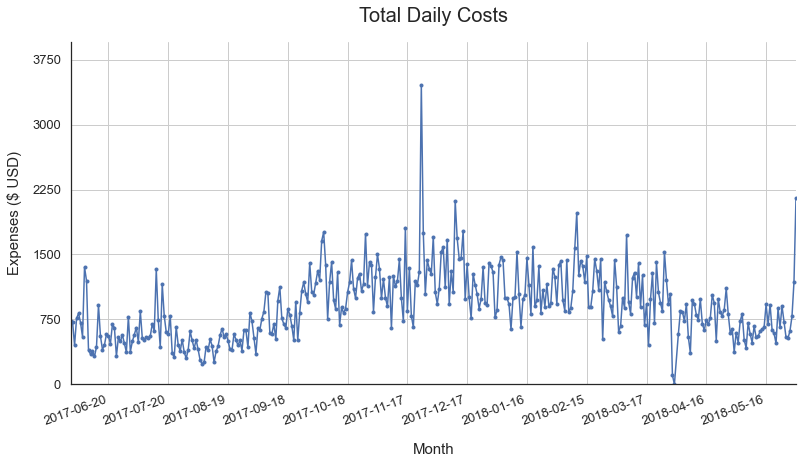

In [121]:
fig, ax = plt.subplots(figsize=(13, 7))

costs.groupby('dt').agg({'costs': 'sum'}).plot(ax=ax, style='.-', legend=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both', labelsize=13)
ax.tick_params(axis='x', rotation=20)
plt.ylim(0, costs.groupby('dt').agg({'costs': 'sum'}).max()[0] + 500)
plt.xlim(costs.groupby('dt').agg({'costs': 'sum'}).index[0],costs.groupby('dt').agg({'costs': 'sum'}).index[-1])
ax.yaxis.set_major_locator(ticker.MultipleLocator(750))
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))

ax.set_xlabel('Month', fontsize=15, labelpad=15)
ax.set_ylabel('Expenses ($ USD)', fontsize=15, labelpad=10)
plt.title('Total Daily Costs', fontsize=20, y=1.04)

ax.grid(axis='both', which='major')
plt.show()

The months of Aug.2017 to Mar.2018 make up the highest amount spent on marketing of which daily costs were centered between the \\$750 to \\$1,500 range. Also, note that the total cost over time reflects the purchasing and visiting patterns seen earlier. For the other months, the total cost appear to be  centered at \\$750 total cost/day. 

With a rough understanding of the marketing costs over time and sources we'll go ahead and dig deeper into the data. In particular, we're interested in finding how the customer acquisition costs vary by marketing source as well determine it's return on investment.

To start, we'll set up the necessary variables to perform our calculations. A new column with the month-year format will be created as well as two variables containing the list of the relevant source ids and years. The visits source id column will also be renamed to make the filtering processes more smoother. Lastly, a dictionary of the total monthly costs and sales will be created.

In [87]:
costs['month'] = costs['dt'].apply(lambda x: x.strftime("%Y-%m"))

In [88]:
monthly_costs = costs.groupby('month').sum()['costs'].to_dict()
month_sales = sales.groupby('first_month').agg({'Revenue': 'sum'
                                                })['Revenue'][:-1].to_dict()

sources = list(costs['source_id'].unique())
years = list(costs['month'].unique())

visits.rename(columns={"Source Id": "source_id"}, inplace=True)

print(month_sales)
print('--------------------------------------------------------------------------------')
print(monthly_costs)

{'2017-06': 24030.249999999665, '2017-07': 16127.91999999999, '2017-08': 11606.259999999995, '2017-09': 34672.71999999986, '2017-10': 27603.449999999695, '2017-11': 26098.769999999677, '2017-12': 33490.109999999666, '2018-01': 16663.129999999994, '2018-02': 16750.49999999997, '2018-03': 19274.29999999993, '2018-04': 11810.609999999946, '2018-05': 13925.759999999964}
--------------------------------------------------------------------------------
{'2017-06': 18015.000000000007, '2017-07': 18240.589999999993, '2017-08': 14790.540000000003, '2017-09': 24368.910000000007, '2017-10': 36322.880000000005, '2017-11': 37907.879999999976, '2017-12': 38315.35, '2018-01': 33518.520000000004, '2018-02': 32723.02999999999, '2018-03': 30415.27000000001, '2018-04': 22289.380000000005, '2018-05': 22224.269999999986}


We'll align the source ids and dates in the visits dataframe with the existing ones in the costs dataframe by using the using the relevant variables created in the previous cell.

In [89]:
report = visits.query("source_id in @sources").query("dates in @years")
report.head(2)

,Uid,Device,End Ts,source_id,Start Ts,start_date,start_week,start_month,start_year,dates,first_month,adj_month
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,2017-12,2017-12,12
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,2018-02,2018-02,2


Now we can go ahead and make our cohorts based on marketing source. The lifetime for the cohorts (months) will be created into columns by using the <b>.unstack()</b> method. 

In [90]:
report = report.groupby(['source_id', 'dates']).agg({
    "Uid": 'nunique'
}).unstack(1)
report.head()

Uid                                                          \
dates     2017-06 2017-07 2017-08 2017-09 2017-10 2017-11 2017-12 2018-01   
source_id                                                                   
1            1034    1131     993    1367    1755    2427    2076    1688   
2            1579    1853    1548    2041    2671    3520    2847    2462   
3            3793    4140    3840    5233    6535    8274    6961    6413   
4            3916    4215    3707    5110    7477    8832    8767    7547   
5            2850    3627    3318    4450    5868    5301    4816    4147   

                                           
dates     2018-02 2018-03 2018-04 2018-05  
source_id                                  
1            1590    1795    1433    1612  
2            2438    2601    2025    2757  
3            6008    5543    4510    4960  
4            7378    7193    6241    6457  
5            4070    3954    4006    3610

The dataframe created contains the monthly unique count per marketing source for the months of Jun. 2017 to May 2018. With that done, we will save a copy of the dataframe to another variable as it will be used to calculate the CAC. The columns will also be converted into a string value--it's current values are currently in multi-index form. 

In [91]:
report_ = report.copy()
report.columns = [i[1] for i in report.columns]
report_.columns = [i[1] for i in report_.columns]

To calculate the avg. purchase value per paying user, we'll append the relevant total monthly revenue to the cohort dataframe.

In [92]:
report = report.reset_index().append(month_sales, ignore_index=True)
report.tail()

,source_id,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
3,4.0,3916.00,4215.00,3707.00,5110.00,7477.00,8832.00,8767.00,7547.00,7378.0,7193.0,6241.00,6457.00
4,5.0,2850.00,3627.00,3318.00,4450.00,5868.00,5301.00,4816.00,4147.00,4070.0,3954.0,4006.00,3610.00
5,9.0,631.00,801.00,718.00,602.00,788.00,1345.00,850.00,814.00,651.0,1549.0,588.00,736.00
6,10.0,411.00,379.00,340.00,474.00,571.00,735.00,474.00,791.00,747.0,927.0,469.00,706.00
7,NaN,24030.25,16127.92,11606.26,34672.72,27603.45,26098.77,33490.11,16663.13,16750.5,19274.3,11810.61,13925.76


Next, we'll use the appended row to determine it's APV for each cohort's lifetime. 

In [93]:
report = report.set_index('source_id').iloc[:-1].divide(report.iloc[-1],
                                                        axis=1).iloc[:, :-1]

In [94]:
report.head(2)

,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1.0,0.043029,0.070127,0.085557,0.039426,0.063579,0.092993,0.061988,0.101301,0.094923,0.093129,0.121332,0.115757
2.0,0.065709,0.114894,0.133376,0.058865,0.096763,0.134872,0.085010,0.147751,0.145548,0.134947,0.171456,0.197978


A brief look through the dataframe shows that the APV per user is relatively increasing over time. This makes sense as it's expected that returning customers APV increase. Let's get a better look at this via a heatmap. 

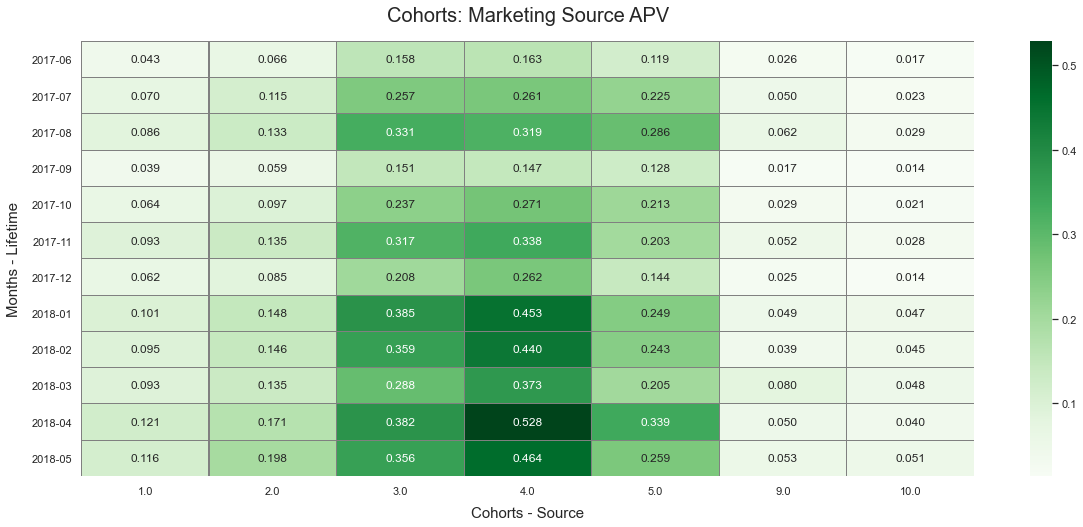

In [95]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(report.transpose(),
            annot=True,
            fmt='.3f',
            linewidths=.05,
            linecolor='gray',
            ax=ax,
            cmap='Greens')

plt.title('Cohorts: Marketing Source APV', fontsize=20, pad=20)
plt.ylabel('Months - Lifetime', size=15, labelpad=10)
plt.xlabel('Cohorts - Source', size=15, labelpad=10)

plt.show()

Users who were acquired through the marketing sources 3 to 5 show the most PV earned over time with those in source 4 increasingly spending more over the year. On the other hand, sources 9 and 10 seem to be the worst performing marketing sources in terms of their PV. 

With the PV calculated, we'll now proceed in doing the same procedures to get each cohort's CAC.

In [96]:
report_ = report_.reset_index().append(monthly_costs, ignore_index=True)
report_ = report_.set_index(
    'source_id').iloc[:-1].divide(report_.iloc[-1], axis=1).iloc[:, :-1]
report_.head(2)

,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1.0,0.057397,0.062005,0.067138,0.056096,0.048317,0.064024,0.054182,0.050360,0.048590,0.059016,0.064291,0.072533
2.0,0.087649,0.101587,0.104661,0.083754,0.073535,0.092857,0.074304,0.073452,0.074504,0.085516,0.090850,0.124054


And now proceed to visualize the CAC for the cohorts via a heatmap.

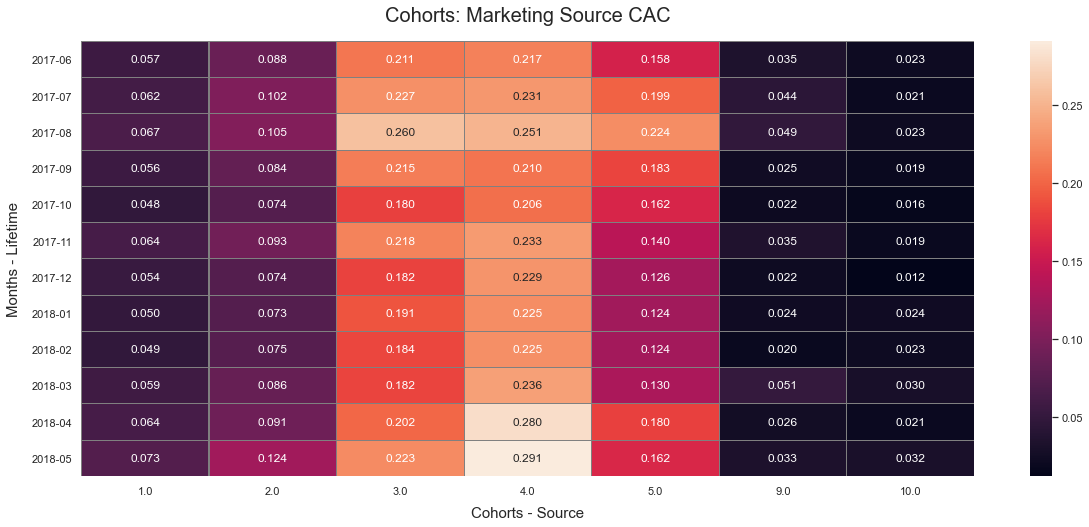

In [97]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(report_.transpose(),
            annot=True,
            fmt='.3f',
            linewidths=.05,
            linecolor='gray',
            ax=ax)

plt.title('Cohorts: Marketing Source CAC', fontsize=20, pad=20)
plt.ylabel('Months - Lifetime', size=15, labelpad=10)
plt.xlabel('Cohorts - Source', size=15, labelpad=10)

plt.show()

When we calculate the CAC per cohort, we can observe that much of the difference seen can be attributed towards an increase in marketing costs. Let's now proceed to check the avg. PV and CAC for each source. 

In [98]:
avg_pv = report.sum(axis=1)
avg_cac = report_.sum(axis=1)

[
    print("Source {:.0f} - APV: {:.2f} Avg. CAC: {:.2f}".format(a, b, c))
    for a, b, c in zip(report.index, avg_pv, avg_cac)
]

Source 1 - APV: 0.98 Avg. CAC: 0.70
Source 2 - APV: 1.49 Avg. CAC: 1.07
Source 3 - APV: 3.43 Avg. CAC: 2.47
Source 4 - APV: 4.02 Avg. CAC: 2.83
Source 5 - APV: 2.61 Avg. CAC: 1.91
Source 9 - APV: 0.53 Avg. CAC: 0.39
Source 10 - APV: 0.38 Avg. CAC: 0.26


[None, None, None, None, None, None, None]

The APV and CAC paint the same picture as the heatmaps that were created above--while source 3 to 5 show the greatest PV, it's correlation to the marketing costs seem to make the difference. 

Lastly, to check for the ROI per soruces we'll divide the margin profit per cohort by its corresponding avg. CAC.

In [99]:
(avg_pv - avg_cac) / avg_cac

source_id
1.0     0.396612
2.0     0.394147
3.0     0.385009
4.0     0.418734
5.0     0.366913
9.0     0.375963
10.0    0.432762
dtype: float64

The ROI for the sources fall between the ranges of \\$.36 to \\$.43 with source 10 surprisingly being the most profitable but not by much. 

Lastly, to check for the length it takes for an average cohort to pay off we'll first calculate the efficiency ratio and compare it against the avg. cumulative PV sum over each month.. 

In [100]:
costs['costs'].sum() / orders['Revenue'].sum()

1.3057814654768838

The 1.305 efficiency ration indicates that \\$1.31 are spent for every dollar earned in revenue; On the aggregate, marketing expenses is costing the company \\$.31 for every revenue dollar. We'll now proceed to calculate the rolling average PV cumulative sum.

In [101]:
report.mean(axis=0).cumsum()

2017-06    0.084501
2017-07    0.227518
2017-08    0.405550
2017-09    0.484974
2017-10    0.617799
2017-11    0.784386
2017-12    0.898667
2018-01    1.103242
2018-02    1.298392
2018-03    1.473029
2018-04    1.706136
2018-05    1.919902
dtype: float64

The output shows that on average, cohorts pay off towards the end of the 9th month (around \\$1.30 avg. PV). The length seems to be a relatively long period for it to break even but explains the negative profit observed; it will take some months from now to see a profit from users in the later months. 

### Conclusion

### Product Summary
>1. <u>How much money was spent? Overall/per source/over time</u>
    - The total marketing cost for the year (Jun.2017 to May.2018) totaled \\$329,131 ( \\$70k more than revenue)
    - Source 3-5 were the most expensive with marketing source 3 expenses amounting to \\$141k. 
    - Over time, marketing expenses reflected the visit and revenue time trends with Aug.2017 to Mar. 2018 showing the highest activity; the daily marketing expenses for the those months ranged between \\$750 to \\$1,500 whilst for the other months centered mostly at around \\$750 per day
    
>2. <u>How much did customer acquisition from each of the sources cost? </u>
    - Source 1 - Avg. PV: 0.98 Avg. CAC: 0.70
    - Source 2 - Avg. PV: 1.49 Avg. CAC: 1.07
    - Source 3 - Avg. PV: 3.43 Avg. CAC: 2.47
    - Source 4 - Avg. PV: 4.02 Avg. CAC: 2.83
    - Source 5 - Avg. PV: 2.61 Avg. CAC: 1.91
    - Source 9 - Avg. PV: 0.53 Avg. CAC: 0.39
    - Source 10 - Avg. PV: 0.38 Avg. CAC: 0.26
    
>3. <u>How worthwhile where the investments? (ROI)</u>
    - The 1.305 efficiency ratio indicates that an average of \\$1.31 is spent for every dollar earned in revenue. This may be due to the average cohort pay off time--9 months. 
    - The ROI for the sources fall between the ranges of \\$0.36 to \\$0.43 with source 10 surprisingly being the most profitable but not by much.
    
---------------------------------------------------------

<a id='item 5'></a>
## 5. General Conclusion

### 5.1 Key Takeways and Recommendations

> Most users seem to be the most active in terms of their session visit and spending behavior, during June to March with the majority accessing the site via their desktop device (70% of share). Over the years, total visit and revenue showed a slight increase in 2018. On the aggregate level, paying users mostly make their purchase from 11 am to 2pm of which buying count decrease over the next hours;  this is followed by another wave of spending between 8 to 10 pm.  Moreover, each of the visits have an average of around 5 minutes spent on the site with a one day average session per user.

> In terms of revenue, a given paying user will bring an average of \\$7.67 to the company over his/her average lifetime (estimated at 1 month). In addition, on a monthly basis there is an average of 2,808 unique active users of which make an aggregate of 3,874 purchases of around 1 purchase per user. It should be noted that, most of that revenue comes from returning users with lifetimes greater than one month as the churn rate within the first month is at a 95\%. Lastly, it was shown that average user ROMI does not differ per marketing source--ROMI ranged from \\$.36 to \\$.41. 

> A more in-depth analysis should be done to find who the returning customers are, what's causing the large churn rate, and how to improve acquisition given the small change in unique visits. 